<a href="https://colab.research.google.com/github/dinog0d/Lab_Biose_Dinoequipo/blob/main/Practica_6/P6_LauraLlanos_DaironMontes_AnnyRaigoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML

html = '''
<div style="border: 2px solid black; padding: 20px; width: 80%; margin: auto; font-family: Arial, sans-serif;">
    <div style="display: flex; justify-content: space-between; align-items: center;">
        <div style="flex: 1;">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Escudo-UdeA.svg/800px-Escudo-UdeA.svg.png"
                 alt="Universidad de Antioquia" style="height: 100px;">
        </div>
        <div style="flex: 3; text-align: center;">
            <h2 style="background-color: #E57373; color: white; padding: 10px 20px; border-radius: 10px;">
                Practica 6: Diseño de filtros digitales
            </h2>
        </div>
        <div style="flex: 1; text-align: right;">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Escudo-UdeA.svg/800px-Escudo-UdeA.svg.png"
                 alt="Universidad de Antioquia" style="height: 100px;">
        </div>
    </div>

    <div style="text-align: center; margin-top: 50px;">
        <p><strong>DAIRON ALBERTO MONTES</strong><br><em>Estudiante de Bioingeniería</em></p>
        <p><strong>LAURA MARIA LLANOS</strong><br><em>Estudiante de Bioingeniería</em></p>
        <p><strong>ANNY ELIZABETH RAIGOZA</strong><br><em>Estudiante de Bioingeniería</em></p>
    </div>

    <div style="text-align: center; margin-top: 50px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Escudo-UdeA.svg/800px-Escudo-UdeA.svg.png"
             alt="Universidad de Antioquia" style="height: 150px;">
        <h3>UNIVERSIDAD DE ANTIOQUIA<br>1803</h3>
    </div>
</div>
'''

display(HTML(html))

# Procedimiento


### Creación de la señal
Genere las secuencias ficticias 𝑥𝑒(𝑛) y 𝑦𝑒(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza 𝜎2 =0,01, establezca 𝛼 = 0,8 y un retraso 𝐷 = 15 muestras. Grafique ambas señales.  

Nota: Para generar el ruido gaussiano use la función de numpy:
np.random.normal.  

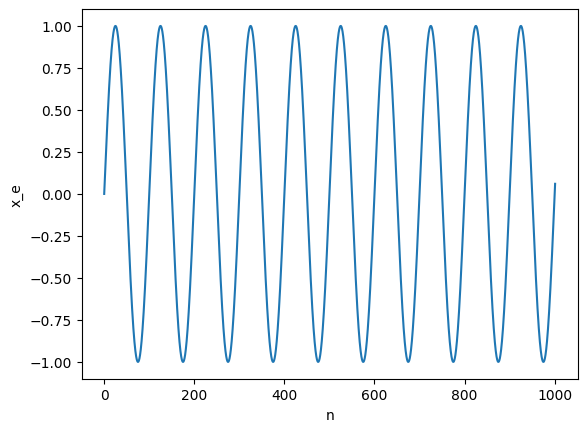

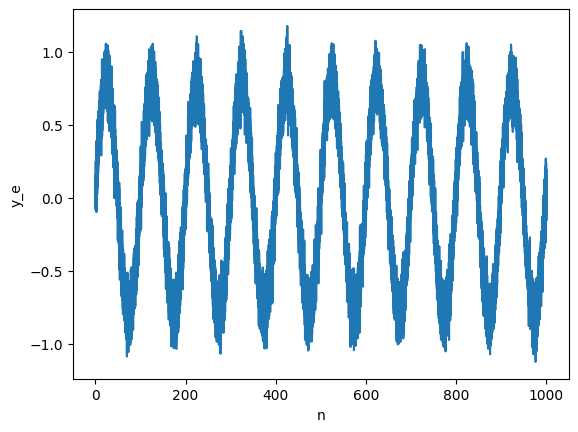

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# creación de x_e, y_e, w_e
F0 = 0.01  # frecuencia fundamental
Fs = 25    # frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15     # retrado inducido en la adquisición
var = 0.01 # varianza del ruido
media = 0  # media del ruido

n = np.arange(0, 1001, 1/Fs) # tiempo
x_e = np.sin(2 * np.pi * F0 * n)
w = np.random.normal(media, np.sqrt(var), len(n)) # ruido gausiano
y_e = alfa * np.sin(2 * np.pi * F0 * (n + D/Fs)) + w # señal adquirida con ruido y retrado

plt.plot(n, x_e)
plt.xlabel('n')
plt.ylabel('x_e')
plt.show()

plt.plot(n, y_e)
plt.xlabel('n')
plt.ylabel('y_e')
plt.show()


#***Diseño del filtro***

**Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.**

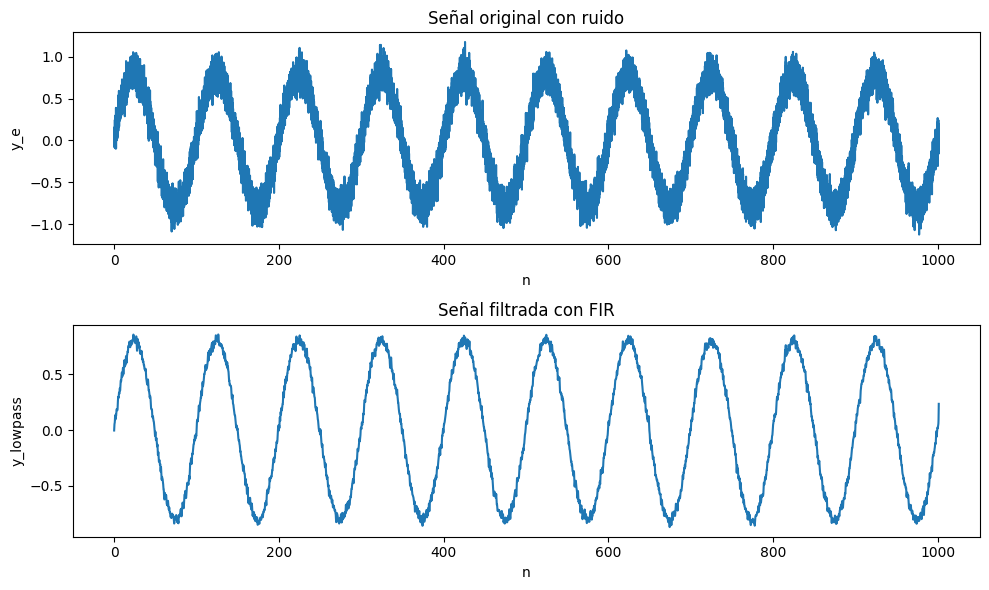

In [ ]:
order = 30
nyquist = Fs / 2

low_cutoff_lowpass = 1.25 / nyquist  # frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order + 1, low_cutoff_lowpass, pass_zero='lowpass', window='hamming')  # filtro
y_lowpass = signal.filtfilt(b=lowpass, a=1, x=y_e)  # aplicación del filtro

fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(n, y_e)
axs[0].set_xlabel('n')
axs[0].set_ylabel('y_e')
axs[0].set_title('Señal original con ruido')

axs[1].plot(n, y_lowpass)
axs[1].set_xlabel('n')
axs[1].set_ylabel('y_lowpass')
axs[1].set_title('Señal filtrada con FIR')

plt.tight_layout()
plt.show()

─────────────── ⋆⋅☆⋅⋆ ───────────────

 **¿Qué cambios hay en los argumentos de la función para implementar un filtro
pasa banda y pasa altas?**

Es importante señalar que para la construcción de filtros, todo gira en torno a la frecuencia de corte (fc), ya que esta, determina el límite en el cual las frecuencias pueden ser atenuadas o permitidas a través del filtro.

En un filtro pasa bajos, la frecuencia de corte marca el límite superior de las frecuencias que se encuentran habilitadas para pasar, mientras que en un filtro pasa altos, indica el límite inferior.

Según la documentación encontrada para el diseño de filtros mediante la función *firwin* [1], el parámetro *pass_zero* determina si el filtro permite el paso de la componente de baja frecuencia. Así, se tiene que:
Si *pass_zero=True*, eso significa que el filtro dejará pasar esas frecuencias bajas (frecuencias por debajo de la fc), así que la señal que entra no se reducirá en esas frecuencias y, se permite el paso de bajas frecuencias.
Si *pass_zero=False*, el filtro no dejará pasar esas frecuencias bajas, y la ganancia a esa frecuencia será 0 (lo que significa que se eliminan o atenuan completamente) y por consecuente, se permite el paso de altas frecuencias.

De igual manera, según la documentación, se encontró que otro parámetro a modificar para tener un filtro paas altas o pasa bajas es el parámetro *cutoff* que se refiere a la frecuencia de corte del filtro. Así, si se desea un filtro pasa bajas *cutoff* es un número que represente la frecuencia máxima permitida, por el contrario, si es un filtro pasa altas, *cutoff* representa la frecuencia mínima permitida.


Por otro lado, es importante aclarar que para la creación del filtro pasa bandas es fundamental dictaminar el rango de frecuencias en las cuales debe de realizarse el proceso de filtrado, brindando el intervalo [frecuencia baja; Frecuencia alta]. donde la frecuencia de corte mayor vienen dada por el filtro pasa bajas mientras que la menor proviene del filtro pasa altas.

Finalmente se resalta que el párametro esencial para variar el filtro pasa bajas entre pasa altas y pasa bandas se encuentra en la declaración del término pass_zero

**IMPORTANTE: Se realizo una prueba con una frecuencia de corte adicional de 7.5
muestras/s para la construcción del pasa bandas y  el filtro pasa altas**



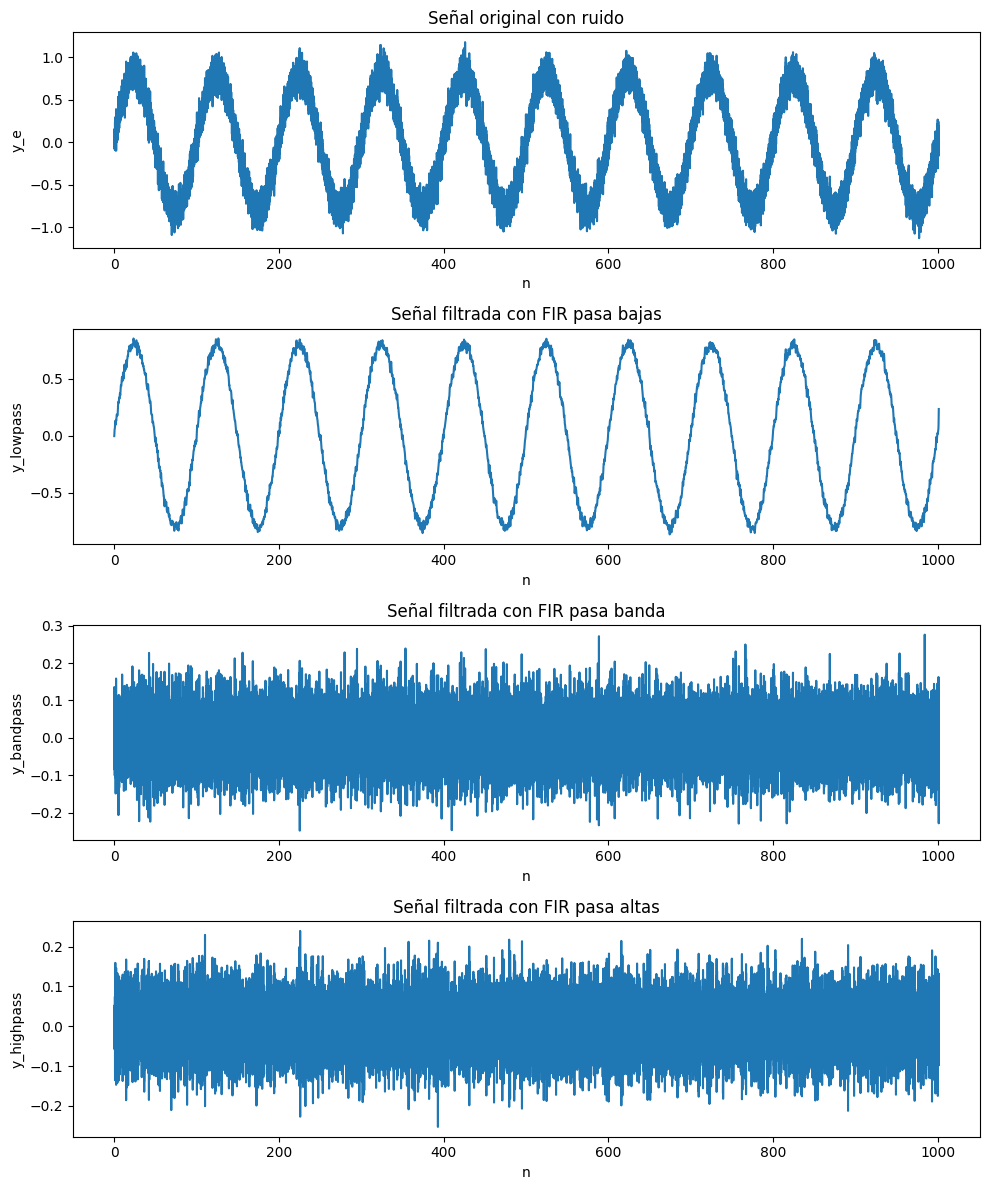

In [ ]:
order = 30
nyquist = Fs / 2

low_cutoff_lowpass = 1.25 / nyquist  # frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order + 1, low_cutoff_lowpass, pass_zero='lowpass', window='hamming')  # filtro
y_lowpass = signal.filtfilt(b=lowpass, a=1, x=y_e)  # aplicación del filtro

low_cutoff = 1.25 / nyquist
high_cutoff = 7.5 / nyquist
bandpass = signal.firwin(order + 1, [low_cutoff, high_cutoff], pass_zero=False, window='hamming')
y_bandpass = signal.filtfilt(b=bandpass, a=1, x=y_e)

high_cutoff_highpass = 7.5 / nyquist # frecuencia de corte para el pasa altas
highpass = signal.firwin(order+1, high_cutoff_highpass, pass_zero='highpass', window='hamming')
y_highpass = signal.filtfilt(b=highpass, a=1, x=y_e)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
axs[0].plot(n, y_e)
axs[0].set_xlabel('n')
axs[0].set_ylabel('y_e')
axs[0].set_title('Señal original con ruido')

axs[1].plot(n, y_lowpass)
axs[1].set_xlabel('n')
axs[1].set_ylabel('y_lowpass')
axs[1].set_title('Señal filtrada con FIR pasa bajas')

axs[2].plot(n, y_bandpass)
axs[2].set_xlabel('n')
axs[2].set_ylabel('y_bandpass')
axs[2].set_title('Señal filtrada con FIR pasa banda')

axs[3].plot(n, y_highpass)
axs[3].set_xlabel('n')
axs[3].set_ylabel('y_highpass')
axs[3].set_title('Señal filtrada con FIR pasa altas')

plt.tight_layout()
plt.show()

**OBSERVACIÓN**
Es importante señalar que los filtros pasa altas y pasabandas presentan un comportamiento con aspecto desordenado que puede ser catalogado erróneamente como ruido, sin embargo se recalca que los filtros pasa altas adquieren las ondulaciones rápidas de la señal con menor losngitud de onda, razón por la cual se identifica tanta cercanía entre picos, adicionalmente el filtro pasa bandas cuenta con la unión de frecuencias bajas y elevadas, razón por la cual se origina el solapamiento de los picos.

Analisis de Bode

In [ ]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

#**Pasa bajas:**

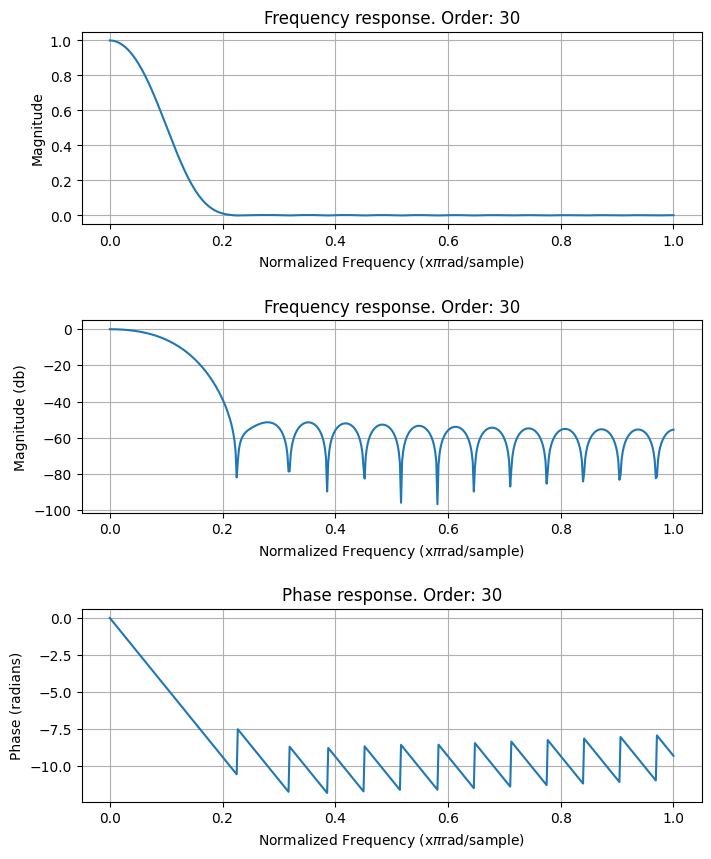

In [ ]:
mfreqz(b=lowpass,a=1,order=order)

#**Pasa banda:**

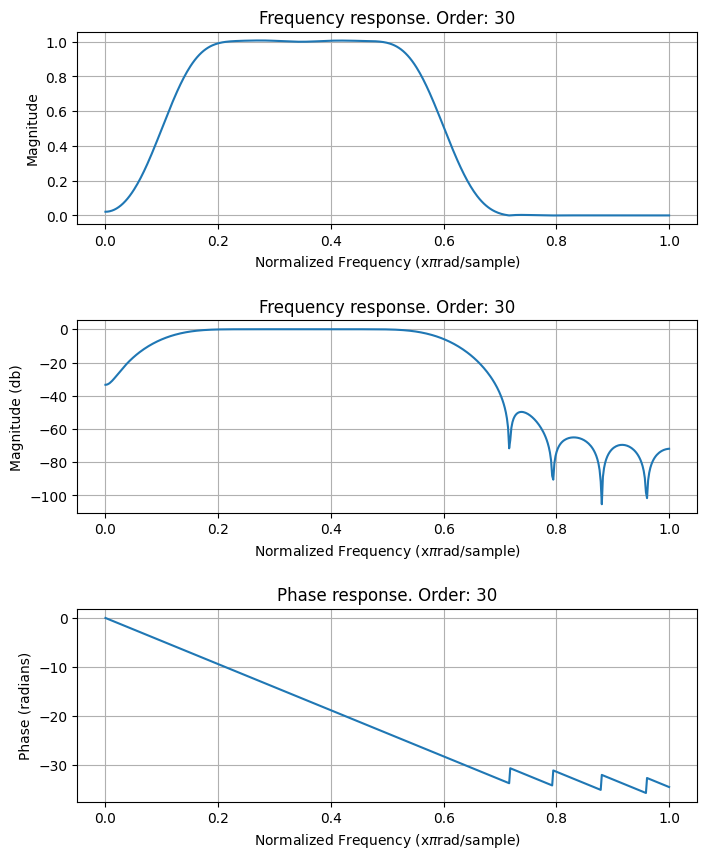

In [ ]:
mfreqz(b=bandpass,a=1,order=order)

#**Pasa alta:**

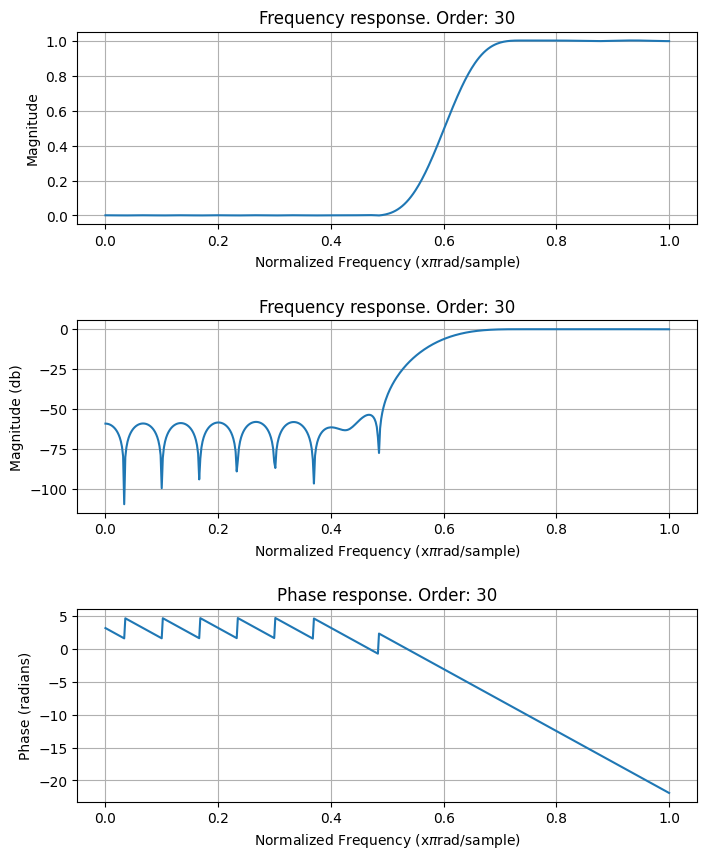

In [ ]:
mfreqz(b=highpass,a=1,order=order)

**Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.**

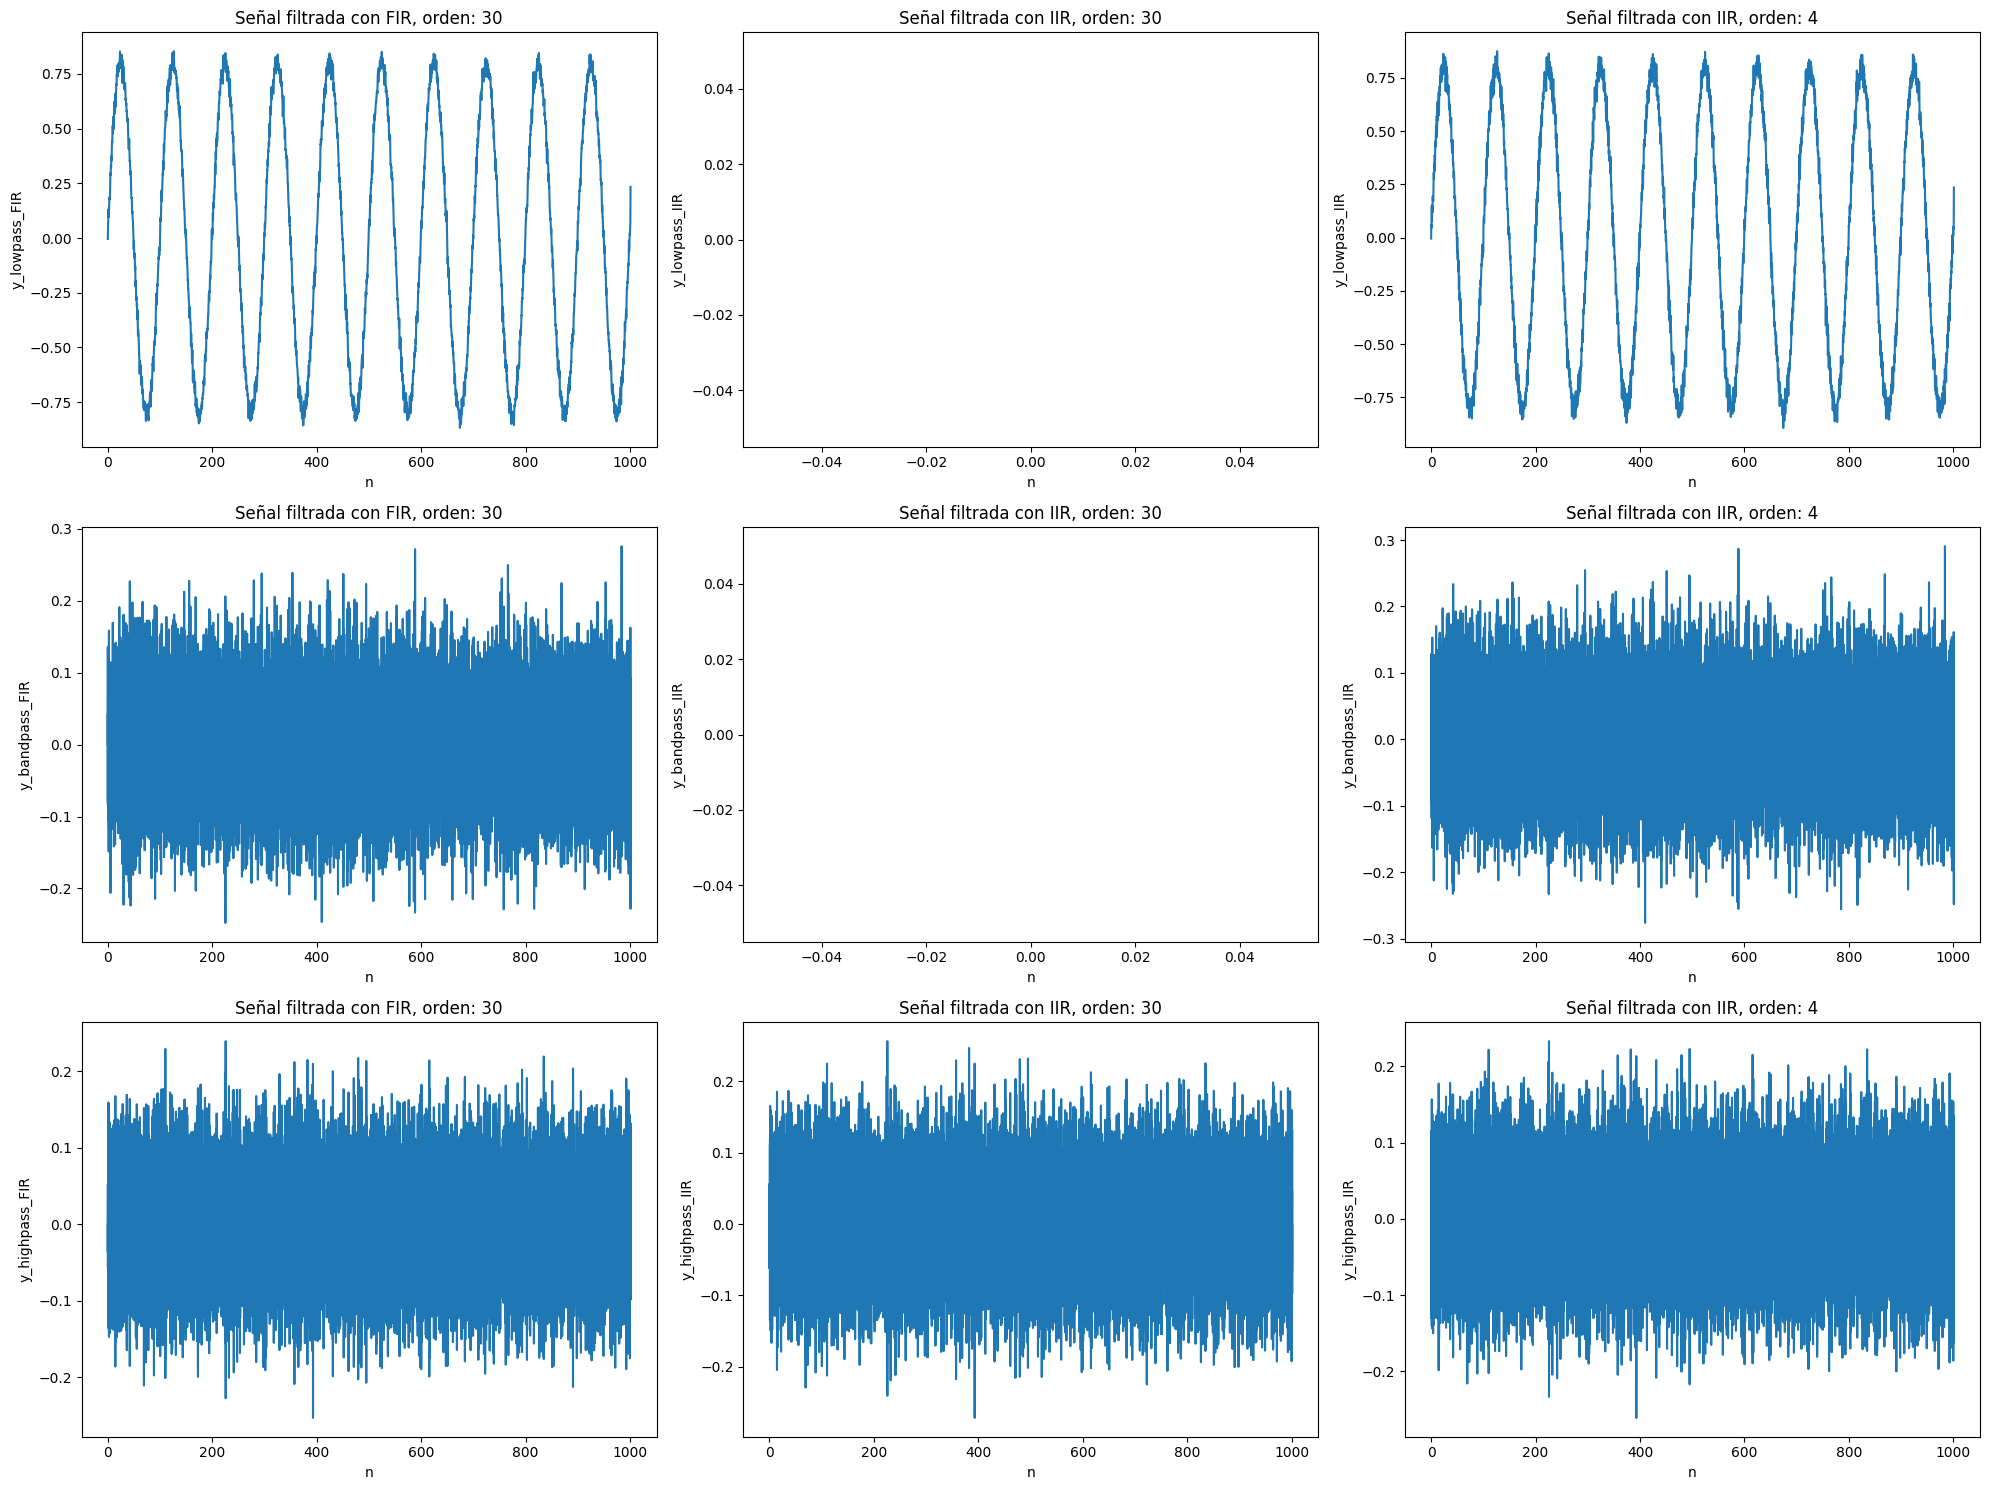

In [ ]:
orderFIR = 30
orderIIR = 4
nyquist = Fs / 2

### Filtro pasabajas
# Filtro FIR
low_cutoff_lowpass = 1.25 / nyquist  # frecuencia de corte normalizada respecto nyquist
lowpass_FIR = signal.firwin(orderFIR + 1, low_cutoff_lowpass, pass_zero='lowpass', window='hamming')  # filtro
y_lowpass_FIR = signal.filtfilt(b=lowpass_FIR, a=1, x=y_e)  # aplicación del filtro

# Filtro IIR con orden 30
lowpass_IIR = signal.iirfilter(orderFIR, low_cutoff_lowpass, btype= 'low', ftype= 'butter')
y_lowpass_IIR = signal.filtfilt(b=lowpass_IIR[0], a=lowpass_IIR[1], x=y_e)

# Filtro IIR con orden 4
lowpass_IIR_2 = signal.iirfilter(orderIIR, low_cutoff_lowpass, btype= 'low', ftype= 'butter')
y_lowpass_IIR_2 = signal.filtfilt(b=lowpass_IIR_2[0], a=lowpass_IIR_2[1], x=y_e)

fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs[0][0].plot(n, y_lowpass_FIR)
axs[0][0].set_xlabel('n')
axs[0][0].set_ylabel('y_lowpass_FIR')
axs[0][0].set_title('Señal filtrada con FIR, orden: 30')

axs[0][1].plot(n, y_lowpass_IIR)
axs[0][1].set_xlabel('n')
axs[0][1].set_ylabel('y_lowpass_IIR')
axs[0][1].set_title('Señal filtrada con IIR, orden: 30')

axs[0][2].plot(n, y_lowpass_IIR_2)
axs[0][2].set_xlabel('n')
axs[0][2].set_ylabel('y_lowpass_IIR')
axs[0][2].set_title('Señal filtrada con IIR, orden: 4')

### Filtro pasa banda
# Filtro FIR
low_cutoff = 1.25 / nyquist  # frecuencia de corte normalizada respecto nyquist
high_cutoff = 7.5 / nyquist # frecuencia de corte para el pasa altas
bandpass_FIR = signal.firwin(orderFIR + 1, [low_cutoff,high_cutoff], pass_zero='bandpass', window='hamming')  # filtro
y_bandpass_FIR = signal.filtfilt(b=bandpass_FIR, a=1, x=y_e)  # aplicación del filtro

# Filtro IIR con orden 30
bandpass_IIR = signal.iirfilter(orderFIR, [low_cutoff,high_cutoff], btype= 'bandpass', ftype= 'butter')
y_bandpass_IIR = signal.filtfilt(b=bandpass_IIR[0], a=bandpass_IIR[1], x=y_e)

# Filtro IIR con orden 4
bandpass_IIR_2 = signal.iirfilter(orderIIR, [low_cutoff,high_cutoff], btype= 'bandpass', ftype= 'butter')
y_bandpass_IIR_2 = signal.filtfilt(b=bandpass_IIR_2[0], a=bandpass_IIR_2[1], x=y_e)

axs[1][0].plot(n, y_bandpass_FIR)
axs[1][0].set_xlabel('n')
axs[1][0].set_ylabel('y_bandpass_FIR')
axs[1][0].set_title('Señal filtrada con FIR, orden: 30')

axs[1][1].plot(n, y_bandpass_IIR)
axs[1][1].set_xlabel('n')
axs[1][1].set_ylabel('y_bandpass_IIR')
axs[1][1].set_title('Señal filtrada con IIR, orden: 30')

axs[1][2].plot(n, y_bandpass_IIR_2)
axs[1][2].set_xlabel('n')
axs[1][2].set_ylabel('y_bandpass_IIR')
axs[1][2].set_title('Señal filtrada con IIR, orden: 4')

### Filtro pasaaltas
# Filtro FIR
high_cutoff_highpass = 7.5 / nyquist # frecuencia de corte para el pasa altas
highpass_FIR = signal.firwin(orderFIR + 1, high_cutoff_highpass, pass_zero='highpass', window='hamming')  # filtro
y_highpass_FIR = signal.filtfilt(b=highpass_FIR, a=1, x=y_e)  # aplicación del filtro

# Filtro IIR con orden 30
highpass_IIR = signal.iirfilter(orderFIR, high_cutoff_highpass, btype= 'high', ftype= 'butter')
y_highpass_IIR = signal.filtfilt(b=highpass_IIR[0], a=highpass_IIR[1], x=y_e)

# Filtro IIR con orden 4
highpass_IIR_2 = signal.iirfilter(orderIIR, high_cutoff_highpass, btype= 'high', ftype= 'butter')
y_highpass_IIR_2 = signal.filtfilt(b=highpass_IIR_2[0], a=highpass_IIR_2[1], x=y_e)

axs[2][0].plot(n, y_highpass_FIR)
axs[2][0].set_xlabel('n')
axs[2][0].set_ylabel('y_highpass_FIR')
axs[2][0].set_title('Señal filtrada con FIR, orden: 30')

axs[2][1].plot(n, y_highpass_IIR)
axs[2][1].set_xlabel('n')
axs[2][1].set_ylabel('y_highpass_IIR')
axs[2][1].set_title('Señal filtrada con IIR, orden: 30')

axs[2][2].plot(n, y_highpass_IIR_2)
axs[2][2].set_xlabel('n')
axs[2][2].set_ylabel('y_highpass_IIR')
axs[2][2].set_title('Señal filtrada con IIR, orden: 4')

plt.tight_layout()
plt.show()

─────────────── ⋆⋅☆⋅⋆ ───────────────

 **Comparación de la señal filtrada en el tiempo para filtro IIR & FIR de orden 30 Análisis en tiempo**

En primer lugar, resulta necesario entender que aplicar únicamente un filtro pasa altas a una señal fisiológica puede ser problemático debido a la naturaleza de las señales. Las señales fisiológicas suelen ser del orden de microvoltios (µV) o milivoltios (mV) [2]. Esto las hace extremadamente vulnerables a cualquier tipo de interferencia externa, que típicamente se encuentra en niveles mucho más altos.

En consecuencia, un filtro pasa altas está diseñado para eliminar las frecuencias más bajas de una señal, permitiendo que las frecuencias superiores pasen. Sin embargo, si la frecuencia de la señal de interés se encuentra en un rango bajo, el filtro puede eliminar no solo el ruido de baja frecuencia, sino también la propia señal fisiológica. Es por ello que, la respuesta del filtro IIR y FIR en configuración de filtro pasa altas único, saca como resultado una señal compuesta principalmente por ruido en el análisis de tiempo.

Ahora bien, la respuesta del filtro IIR en configuraciones de pasa bajas y pasa banda no genera ninguna salida significativa, lo que resulta en un gráfico en blanco, comportamiento que también se justifica a la característica del IIR de abarcar menores ordenes en comparación del FIR, debido a esto, al reducir el orden del filtro IIR a 4, se obtiene una señal, aunque esta es muy ruidosa y presenta un filtrado poco efectivo en la configuración de pasa banda. Sin embargo, en la configuración de pasa bajas, se evidencia una señal con menores cantidades de ruido.

Este comportamiento puede explicarse por el hecho de que los filtros IIR introducen distorsión de fase no lineal, la cual se vuelve más problemática a medida que se aumenta el orden del filtro. Esta distorsión puede deteriorar significativamente la calidad de la señal, especialmente en los filtros pasa banda y pasa bajas en este caso. En contraste, los filtros FIR pueden diseñarse para mantener una fase lineal, lo que evita este problema de degradación de la señal, aunque esto no garantice resultados óptimos en el filtrado.


─────────────── ⋆⋅☆⋅⋆ ───────────────

 **Comparación de la señal filtrada en el tiempo para filtro IIR & FIR de orden 30 Análisis de BODE**

 Debido a que el análisis en el tiempo no fue concluyente, se optó por la realización de un análisis de magnitud y fase a través de un diagrama de bode de cada uno de los filtros IIR y FIR obtenidos, siendo a partir de este análisis que se indican los siguientes comportamientos:


1.   Al evaluar el bode del filtro pasa bajas se indica que los filtros FIR cuentan con una menor distorsión de la banda pasante y la fase (sin alteraciones abruptas), sin embargo, esta conducta es a costa del aumento del ancho de banda del filtro digital, haciendo que abarque un mayor rango de frecuencias, donde incluso incrementa las oscilaciones de la banda de rechazo de la señal procesada.
2.   En el filtro pasa bandas se reconoce una mayor estabilidad de magnitud en el filtro FIR de orden 30, el cual conserva la linealidad de la banda pasante, siendo el caso contrario los leves picos oscilatorios presentados en la banda de paso de los IIR de orden 30 y 4, en esta sección se rectifican nuevamente la presencia de una mayor cantidad de ondulaciones en la señal de rechazo del FIR que generan alteraciones en las lecturas de la señal.
3. El filtro pasa altas IIR de orden 30 cuenta con una pendiente de atenuación más pronunciada (recta) en comparación de la pendiente evidenciada en el orden 4, adicionalmente, se identifica que esta medida de transición es más abrupta en el IIR que en el FIR razón que permite indicar que el filtrado mediante IIR abarca un menor ancho de banda o barrido de frecuencias, no obstante, se rectifica que este último presenta menor aleatoriedad de oscilaciones en la banda de rechazo y una mayor distorsión de fase.




## Pasa bajas

Pasa bajas FIR

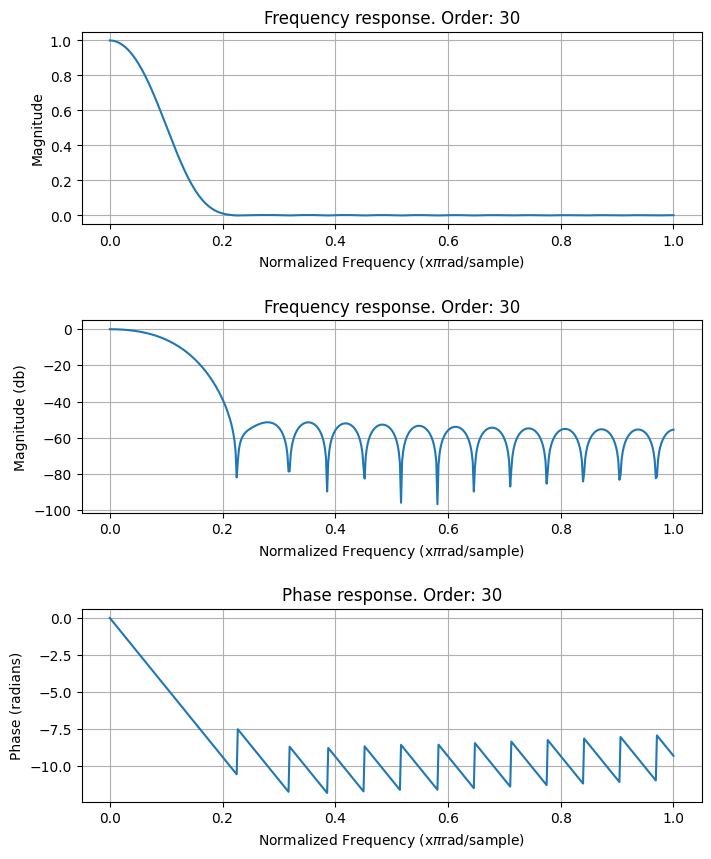

In [ ]:
mfreqz(b=lowpass_FIR,a=1,order=orderFIR)

Pasa bajas IIR con orden 30

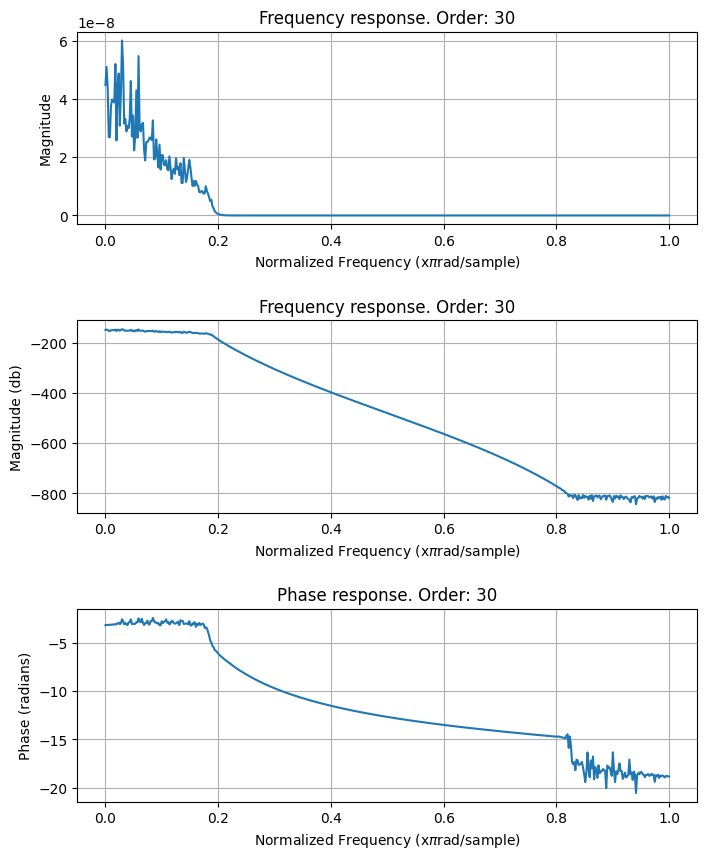

In [ ]:
mfreqz(b=lowpass_IIR[0],a=lowpass_IIR[1],order=orderFIR)

Pasa bajas IIR con orden 4

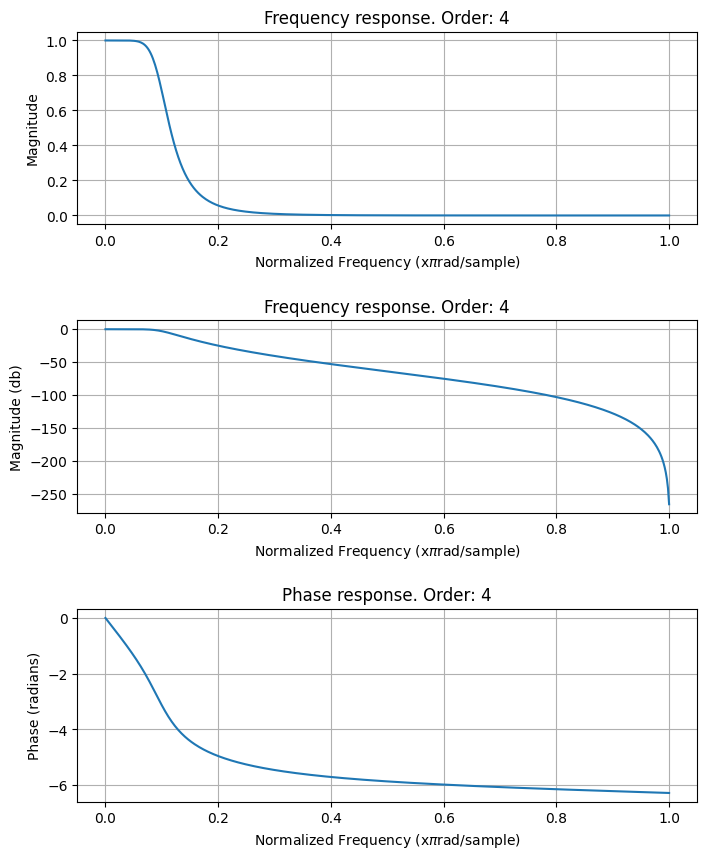

In [ ]:
mfreqz(b=lowpass_IIR_2[0],a=lowpass_IIR_2[1],order=orderIIR)

## Pasa banda

Pasa banda FIR

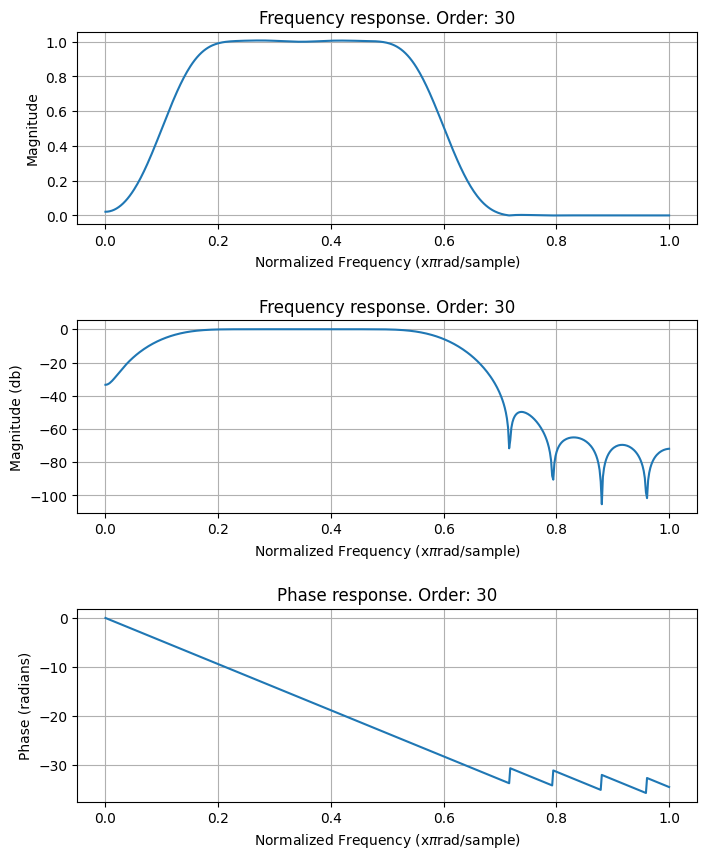

In [ ]:
mfreqz(b=bandpass_FIR,a=1,order=orderFIR)

Pasa banda IIR con orden 30

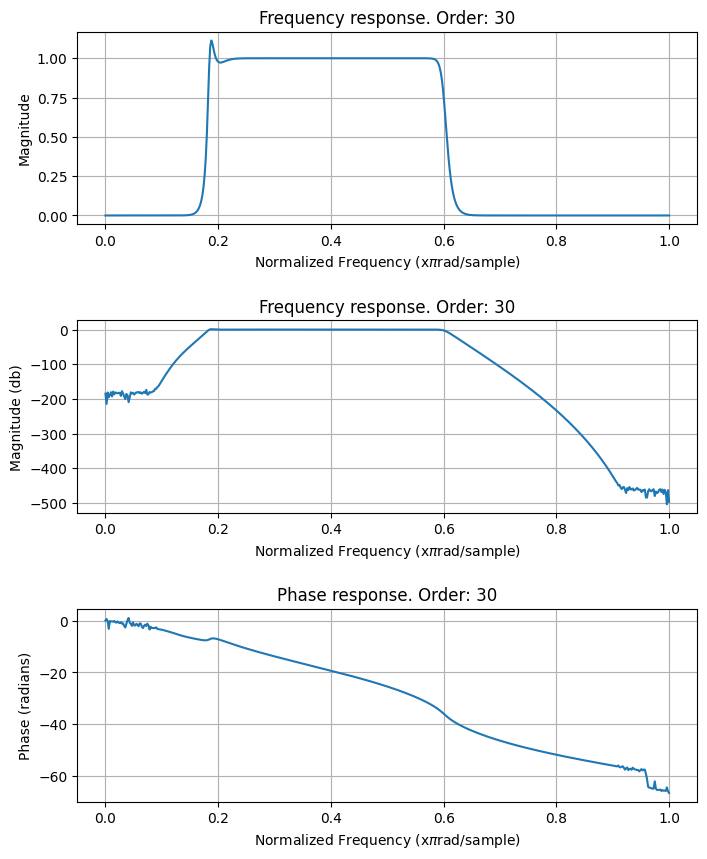

In [ ]:
mfreqz(b=bandpass_IIR[0],a=bandpass_IIR[1],order=orderFIR)

Pasa banda IIR con orden 4

<ipython-input-5-9cb590c39e1c>:17: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * np.log10 (abs(h));


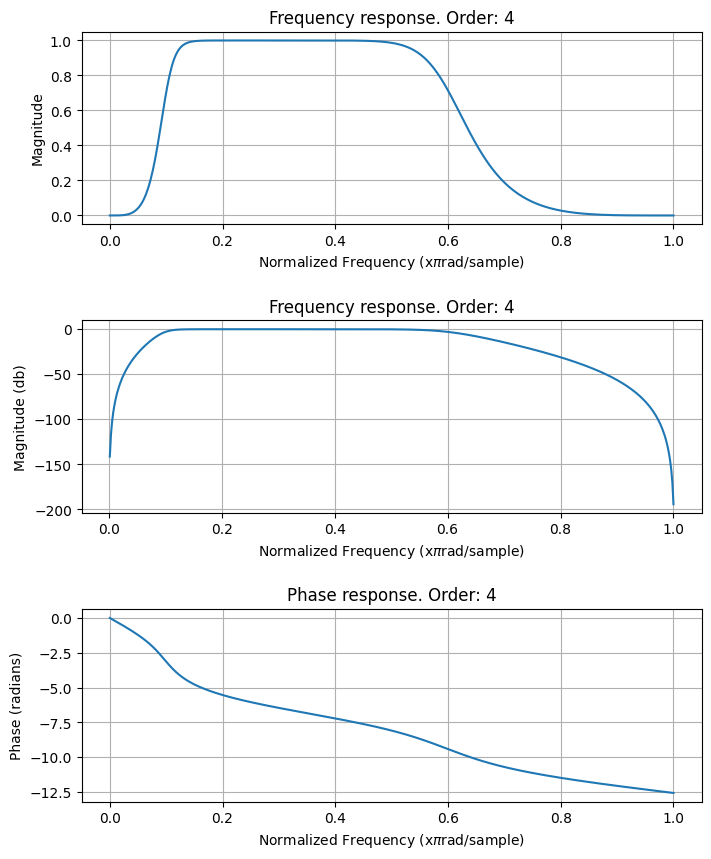

In [ ]:
mfreqz(b=bandpass_IIR_2[0],a=bandpass_IIR_2[1],order=orderIIR)

## Pasa altas

Pasa altas FIR

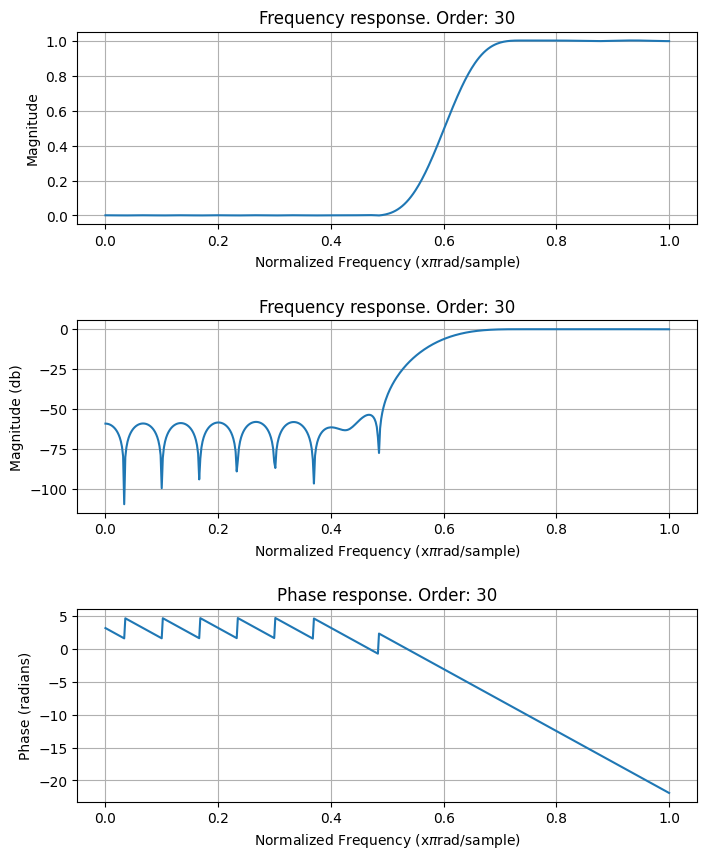

In [ ]:
mfreqz(b=highpass_FIR,a=1,order=orderFIR)

Pasa altas IIR con orden 30

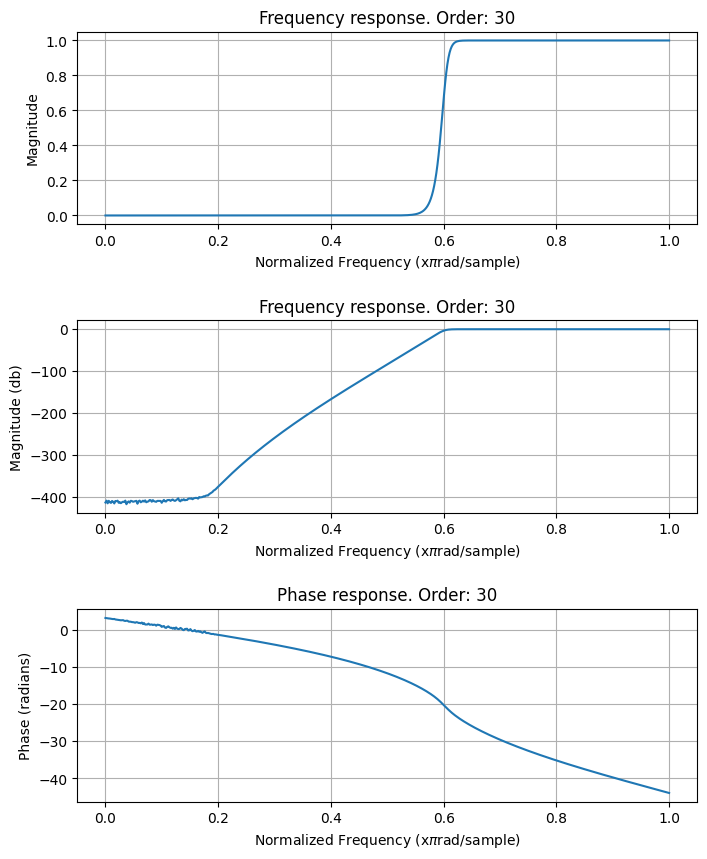

In [ ]:
mfreqz(b=highpass_IIR[0],a=highpass_IIR[1],order=orderFIR)

Pasa altas IIR con orden 4

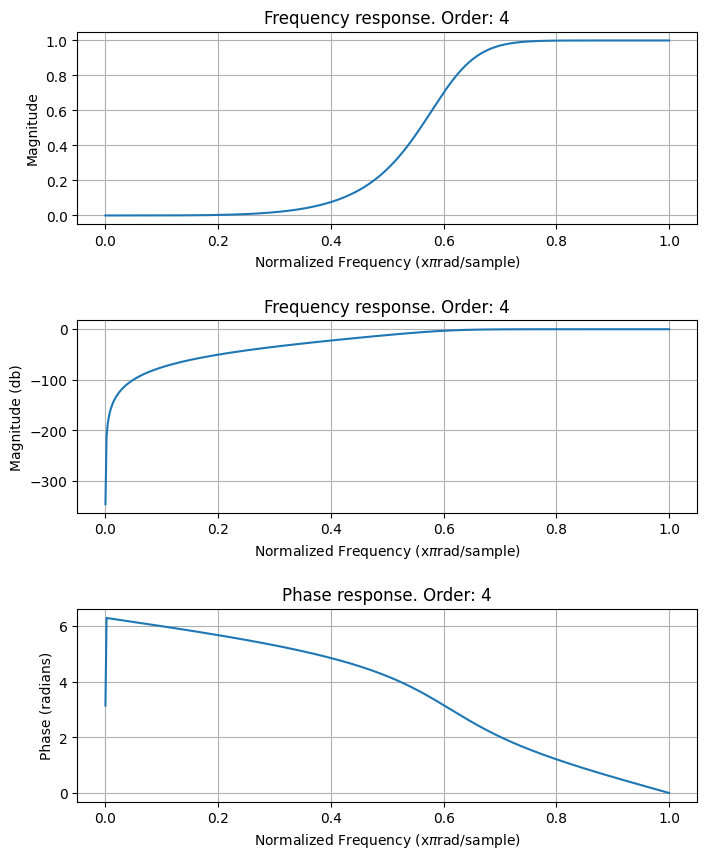

In [ ]:
mfreqz(b=highpass_IIR_2[0],a=highpass_IIR_2[1],order=orderIIR)

### Filtrado

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro
IIR o FIR.

─────────────── ⋆⋅☆⋅⋆ ───────────────


**¿Por qué se utiliza sólo el numerador?**
**1.** En las funciones `filtfilt` y `lfilter`, el argumento `b` se refiere a los coeficientes del numerador del filtro digital. En los filtros FIR, la función de transferencia se define solo por los coeficientes del numerador. Estos coeficientes representan las contribuciones de las muestras de entrada al valor de salida. No hay una parte de denominador a considerar, ya que estos filtros no tienen retroalimentación. Por otro lado, en los filtros IIR se requiere tanto el numerador como el denominador. Sin embargo, en el contexto de `filtfilt`, se utiliza `a` en el formato `filtfilt(b, a, x)`, donde `a` puede estar en el caso de un filtro que tiene componentes de retroalimentación.[1]

**¿A qué hace referencia el numerador?**

**2.** El numerador contiene los coeficientes que se definen cómo las entradas pasadas o valores pasados que afectan la salida, razón por la cual se consideran filtros recursivos.

**¿Evidencia cambios en el uso de las funciones de filtrado?**
**3.** Sí es posible la identificación de cambios en el uso de las funciones, para el filtro FIR, el uso de `filtfilt` aplica el filtro hacia adelante y hacia atrás, lo que resulta en una señal sin distorsión de fase, ya que los filtros FIR no necesitan un denominador.
Para los filtros IIR, el uso de `filtfilt` requiere un intervalo de puntos tanto `b` como `a`. Sin embargo, se observó que en el código se ajusta correctamente al aplicar `filtfilt` para los filtros IIR, usando sus coeficientes correspondientes.

**¿Cómo se puede explicar la falta de coincidencia?**

**4.** La falta de coincidencia entre los resultados se debe al orden del filtro, ya que, un filtro de orden más alto generalmente proporciona una respuesta de frecuencia más selectiva, lo que puede resultar en diferencias notables en la salida. Además, el tipo de filtro utilizado puede dar una señal más estable, o por el contrario, introducir oscilaciones si no se diseña adecuadamente.

**¿Es adecuado el orden del filtro usado? Analice.**

**5**. Un mayor orden de filtro da como resultado una banda de transición más ideal y de rapida respuesta [2], no obstante, un filtro de orden 30 puede proporcionar una buena atenuación y comportamiento deseable a coste de un mayor costo computacional.
Si bien, el orden 4 puede ser adecuado para ciertas aplicaciones, puede no proporcionar suficiente selectividad en comparación con el filtro FIR de orden 30. En general, un filtro IIR de orden más bajo puede ser suficiente si no se requiere una atenuación extrema o si se aceptan ciertas distorsiones en la respuesta de fase, pero como estamos hablando de señales fisiológicas, se espera una respuesta más rápida y selectiva para que no entre ningún tipo de contaminación.



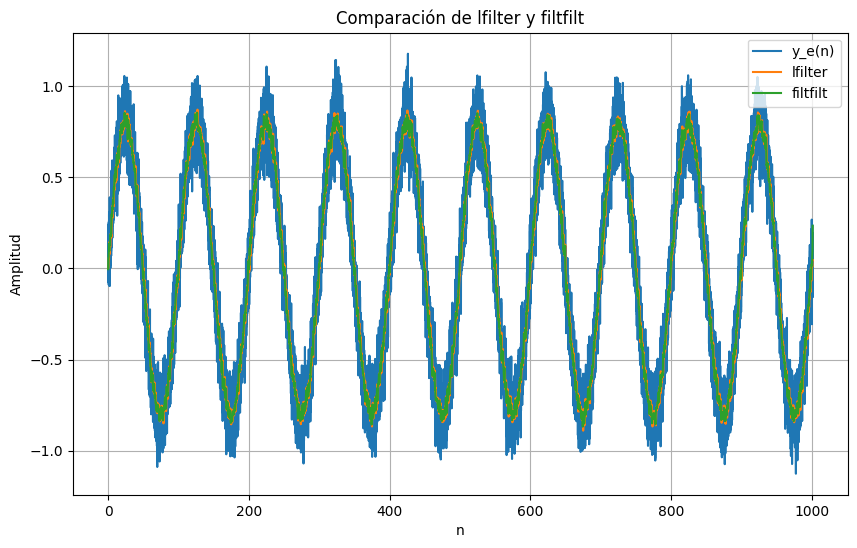

En el caso de los filtros FIR, se utiliza solo el numerador (b) porque el denominador (a) es igual a 1.
El numerador representa los coeficientes del filtro FIR, que definen la respuesta en frecuencia del filtro.
La función lfilter realiza un filtrado no recursivo (directa), mientras que la función filtfilt realiza un filtrado de doble pasada, donde se filtra la secuencia original y su versión invertida. Esto hace que la fase del filtro tenga efecto cero.
La diferencia entre ambas funciones y el filtrado realizado directamente en el paso anterior es mínima, por lo que el orden del filtro utilizado es adecuado. Es posible apreciar una leve diferencia en la amplitud de la señal filtrada y una pequeña desviación en la fase, lo que es debido a las características diferentes de las funciones lfilter y filtfilt, especialmente en el manejo de la fase.


In [ ]:
# Aplicar lfilter
y_lfilter = signal.lfilter(b=lowpass, a=1, x=y_e)

# Aplicar filtfilt
y_filtfilt = signal.filtfilt(b=lowpass, a=1, x=y_e)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(n, y_e, label='y_e(n)')
plt.plot(n, y_lfilter, label='lfilter')
plt.plot(n, y_filtfilt, label='filtfilt')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Comparación de lfilter y filtfilt')
plt.legend()
plt.grid(True)
plt.show()

# Análisis
print("En el caso de los filtros FIR, se utiliza solo el numerador (b) porque el denominador (a) es igual a 1.")
print("El numerador representa los coeficientes del filtro FIR, que definen la respuesta en frecuencia del filtro.")
print("La función lfilter realiza un filtrado no recursivo (directa), mientras que la función filtfilt realiza un filtrado de doble pasada, donde se filtra la secuencia original y su versión invertida. Esto hace que la fase del filtro tenga efecto cero.")
print("La diferencia entre ambas funciones y el filtrado realizado directamente en el paso anterior es mínima, por lo que el orden del filtro utilizado es adecuado. Es posible apreciar una leve diferencia en la amplitud de la señal filtrada y una pequeña desviación en la fase, lo que es debido a las características diferentes de las funciones lfilter y filtfilt, especialmente en el manejo de la fase.")

Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛)

─────────────── ⋆⋅☆⋅⋆ ───────────────



**¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.**
1. Mientras que el numerador representa los coeficientes de un filtro FIR, en los filtros IIR, el numerador también incluye las contribuciones de las entradas pasadas. Por otro lado, el denominador, Se utiliza exclusivamente en filtros IIR y define cómo las salidas pasadas afectan la salida actual. Esto introduce retroalimentación, lo que permite que la respuesta del filtro tenga un comportamiento de respuesta infinita.  

2. El orden de filtro se selecciona acorde a la aplicación, como se mencionó anteriormente, un mayor orden proporciona una respuesta más rápida pero que puede desfasar la señal o tener otro tipo de implicaciones. En este contexto, un orden mayor generalmente proporciona mejor atenuación fuera de la banda de paso, pero también requiere más recursos computacionales. Por otro lado, un orden bajo, puede requerir menos gasto computacional pero puede que no se logre la atenuación adecuada en la banda de stop, lo que podría resultar en una filtración ineficiente de las frecuencias no deseadas.

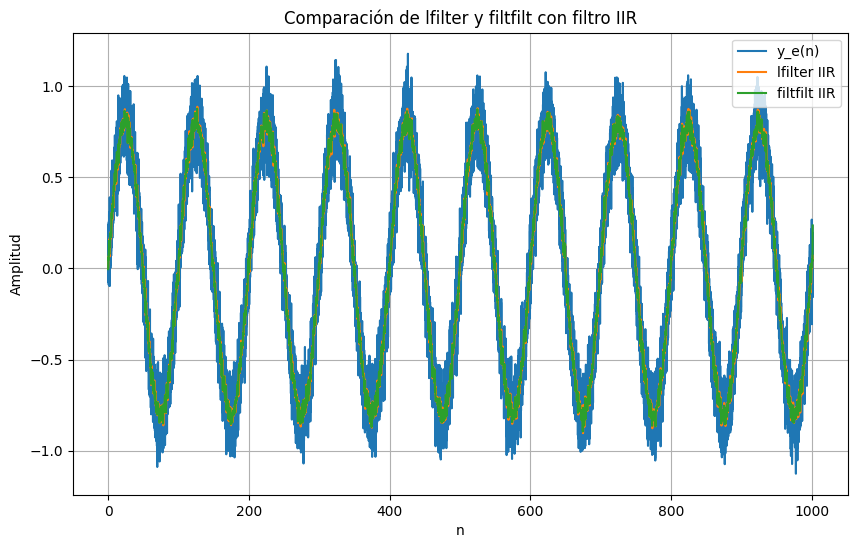


Análisis para filtros IIR:
En los filtros IIR, se utilizan tanto el numerador (b) como el denominador (a) porque estos definen la función de transferencia del filtro, que es una relación entre la salida y la entrada del sistema. 
El numerador representa la respuesta directa a la entrada del sistema, mientras que el denominador representa la respuesta recursiva, que depende de salidas pasadas.  La combinación de ambos determina la forma de la respuesta del filtro en el dominio de la frecuencia.
El orden del filtro influye significativamente en la respuesta.  Un orden mayor puede proveer mejor atenuación en la banda rechazada, pero puede incrementar la complejidad computacional y la inestabilidad numérica.  Un orden menor puede tener una menor atenuación, pero es menos costoso computacionalmente.




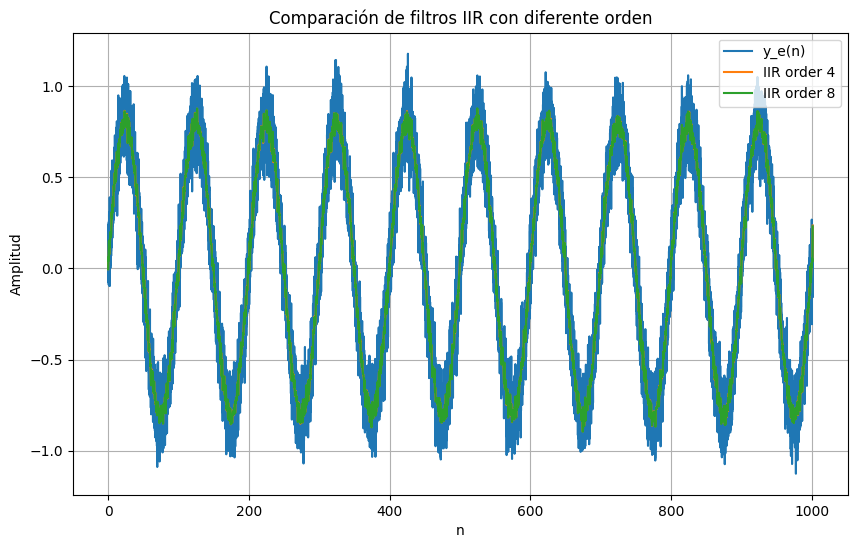

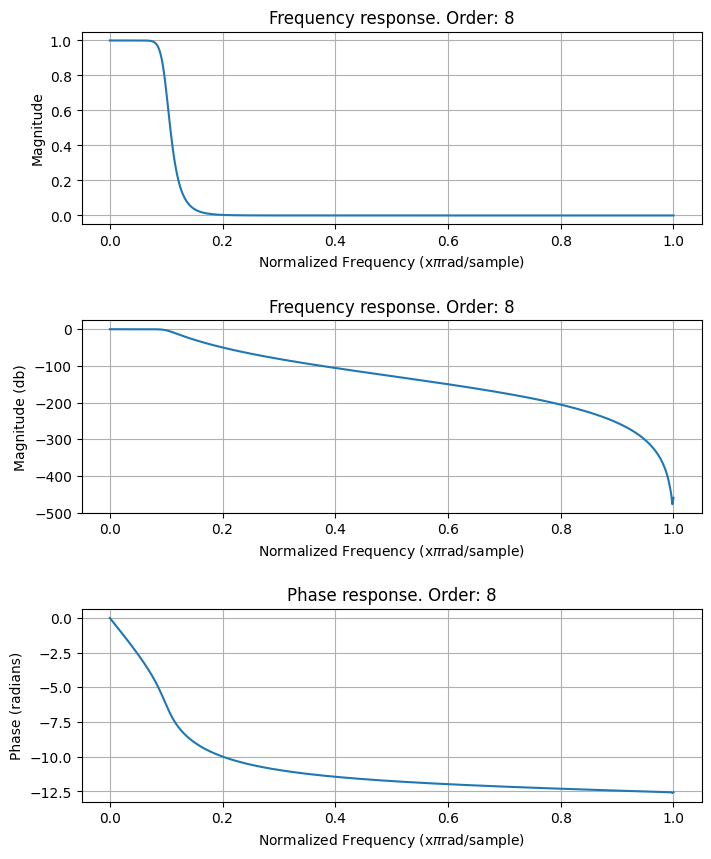


Al cambiar el orden del filtro IIR de 4 a 8, se observa una ligera modificación en la respuesta en frecuencia. Para un análisis más profundo, se deben comparar las respuestas en frecuencia de ambos filtros en el diagrama de Bode para determinar si el nuevo orden es más adecuado para la señal en cuestión.


In [ ]:
# Aplicar lfilter con el filtro IIR de orden 4 (lowpass_IIR_2)
y_lfilter_iir = signal.lfilter(b=lowpass_IIR_2[0], a=lowpass_IIR_2[1], x=y_e)

# Aplicar filtfilt con el filtro IIR de orden 4 (lowpass_IIR_2)
y_filtfilt_iir = signal.filtfilt(b=lowpass_IIR_2[0], a=lowpass_IIR_2[1], x=y_e)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(n, y_e, label='y_e(n)')
plt.plot(n, y_lfilter_iir, label='lfilter IIR')
plt.plot(n, y_filtfilt_iir, label='filtfilt IIR')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Comparación de lfilter y filtfilt con filtro IIR')
plt.legend()
plt.grid(True)
plt.show()

# Análisis para IIR
print("\nAnálisis para filtros IIR:")
print("En los filtros IIR, se utilizan tanto el numerador (b) como el denominador (a) porque estos definen la función de transferencia del filtro, que es una relación entre la salida y la entrada del sistema. ")
print("El numerador representa la respuesta directa a la entrada del sistema, mientras que el denominador representa la respuesta recursiva, que depende de salidas pasadas.  La combinación de ambos determina la forma de la respuesta del filtro en el dominio de la frecuencia.")
print("El orden del filtro influye significativamente en la respuesta.  Un orden mayor puede proveer mejor atenuación en la banda rechazada, pero puede incrementar la complejidad computacional y la inestabilidad numérica.  Un orden menor puede tener una menor atenuación, pero es menos costoso computacionalmente.")
print("\n")

# Prueba con diferente orden (por ejemplo, orden 8)
orderIIR_new = 8
lowpass_IIR_new = signal.iirfilter(orderIIR_new, low_cutoff_lowpass, btype='low', ftype='butter')
y_lowpass_IIR_new = signal.filtfilt(b=lowpass_IIR_new[0], a=lowpass_IIR_new[1], x=y_e)

plt.figure(figsize=(10, 6))
plt.plot(n, y_e, label='y_e(n)')
plt.plot(n, y_lowpass_IIR_2, label=f'IIR order {orderIIR}')
plt.plot(n, y_lowpass_IIR_new, label=f'IIR order {orderIIR_new}')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title(f'Comparación de filtros IIR con diferente orden')
plt.legend()
plt.grid(True)
plt.show()

mfreqz(b=lowpass_IIR_new[0], a=lowpass_IIR_new[1], order=orderIIR_new)

print(f"\nAl cambiar el orden del filtro IIR de {orderIIR} a {orderIIR_new}, se observa una ligera modificación en la respuesta en frecuencia. Para un análisis más profundo, se deben comparar las respuestas en frecuencia de ambos filtros en el diagrama de Bode para determinar si el nuevo orden es más adecuado para la señal en cuestión.")

**ANÁLISIS DE BODE**

Por medio de las gráficas obtenidas anteriormente se indica que la disminución del orden del filtro IRR de n=30 a n=8 ocasionó una pérdida de selectividad en la banda de transición y un aumento considerable del ancho de banda de trabajo del filtro, por otro lado, es importante destacar la disminución de transitorios o picos de resonancia en la zona de la banda de paso, hecho que facilita conservar las características de la señal.

# Aplicación

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz.
Extraiga y trabaje con el canal 1 de la señal.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
snl_filtros = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Bioseñales/P6/senal_filtros.txt')
snl_filtros_1 = snl_filtros[:, 0] # Extraer el canal 1 de la señal
fs = 500 # Frecuencia de muestreo de la señal

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal

─────────────── ⋆⋅☆⋅⋆ ───────────────

**¿Hay presencia de ruido eléctrico? Analice.**

Debido a las limitaciones del proyecto y del filtrado, se indica que en una primera visualización de la gráfica No se identifican componentes de potencia elevados en rangos de frecuencia altos, como lo son las interferencias por radiofrecuencia y ruido eléctrico, razón por la cual se dennota la presencia de ruidos mínimos en altas frecuencias, sin embargo, al evaluar los altos niveles de energía contenidos en los rangos de frecuencias bajos de 0 a 3Hz, se profiere la posibilidad de la presencia de ruidos de bajo nivel ocasionados por interferencias internas del sistema analizado.

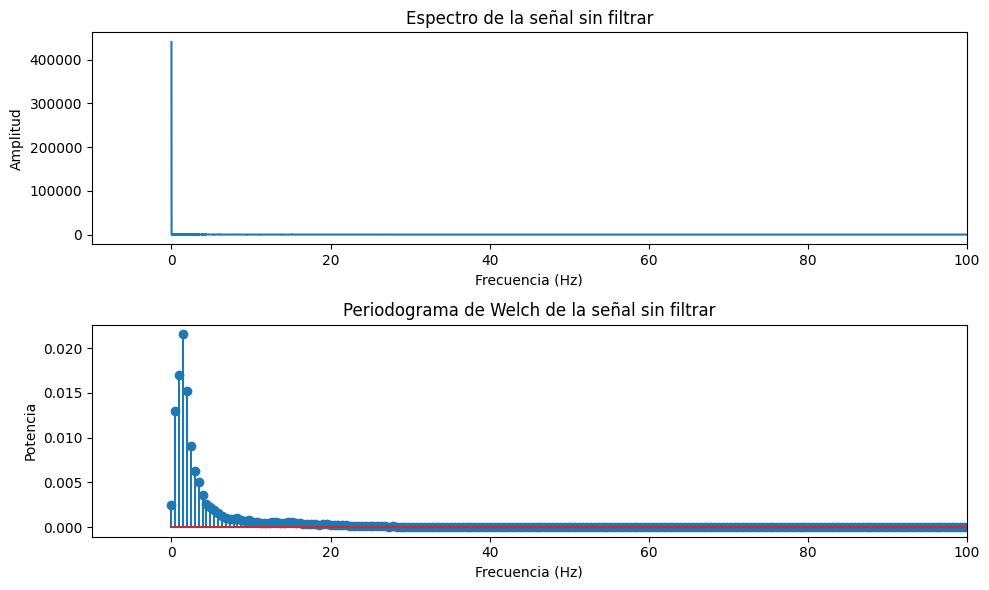

In [ ]:
# Espectro y Periodograma de Welch de la señal sin filtrar
X = np.fft.fft(snl_filtros_1)
N = len(X)
F = np.arange(0, N) * fs / N
f, Pxx = signal.welch(snl_filtros_1, fs, window='hann', nperseg=1024, noverlap=512)

fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(F, np.abs(X))
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Espectro de la señal sin filtrar')
axs[0].set_xlim(-10, 100)

axs[1].stem(f, Pxx)
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Potencia')
axs[1].set_title('Periodograma de Welch de la señal sin filtrar')
axs[1].set_xlim(-10, 100)
plt.tight_layout()
plt.show()

Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego
verifique nuevamente el comportamiento en frecuencia (periodograma de Welch
de la señal filtrada)

─────────────── ⋆⋅☆⋅⋆ ───────────────

#**¿Hay cambios? Analice.**

Gracias a la aplicación del filtro FIR es posible evidenciar la erradicación del ruido eléctrico que envuelve a la señal de interés, este fenómeno puede ser observado al analizar los puntos de máyor potencia registrados en el periodograma de la señal sin filtrar los cuales se presentan en un rango de 59 a 61 Hz intervalo propio de las interferencias ocasionadas por la red eléctrica. Se resalta además la uniformidad de potencias registradas en el periodograma de la señal filtrada, hecho que permite inferir que las capturas tomadas de la señal eran en su mayoría producto de ruidos externos


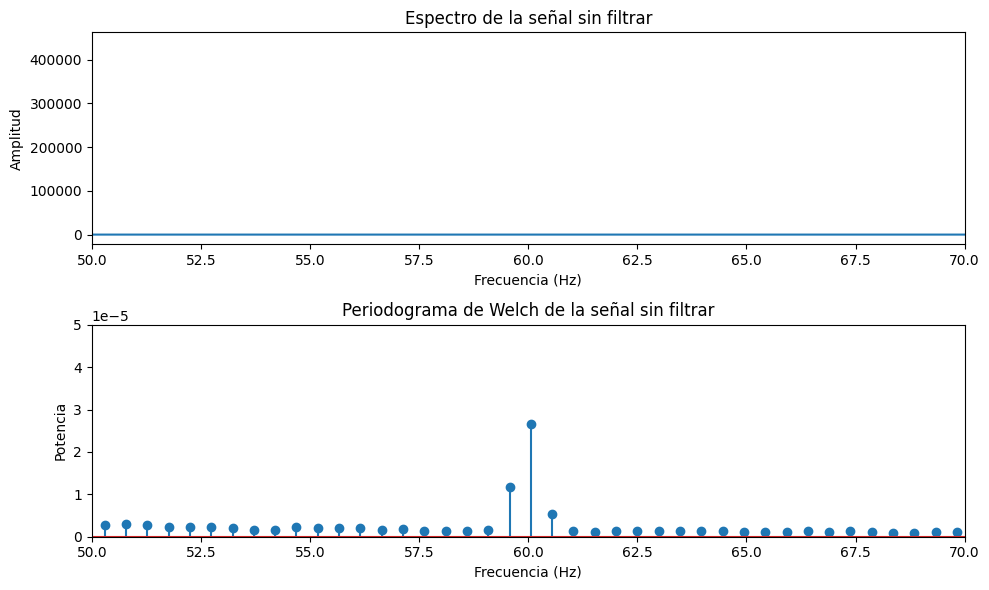

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(F, np.abs(X))
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Espectro de la señal sin filtrar')
axs[0].set_xlim(50, 70)
axs[1].stem(f, Pxx)
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Potencia')
axs[1].set_title('Periodograma de Welch de la señal sin filtrar')
axs[1].set_xlim(50, 70)
axs[1].set_ylim(0,0.00005)
plt.tight_layout()
plt.show()

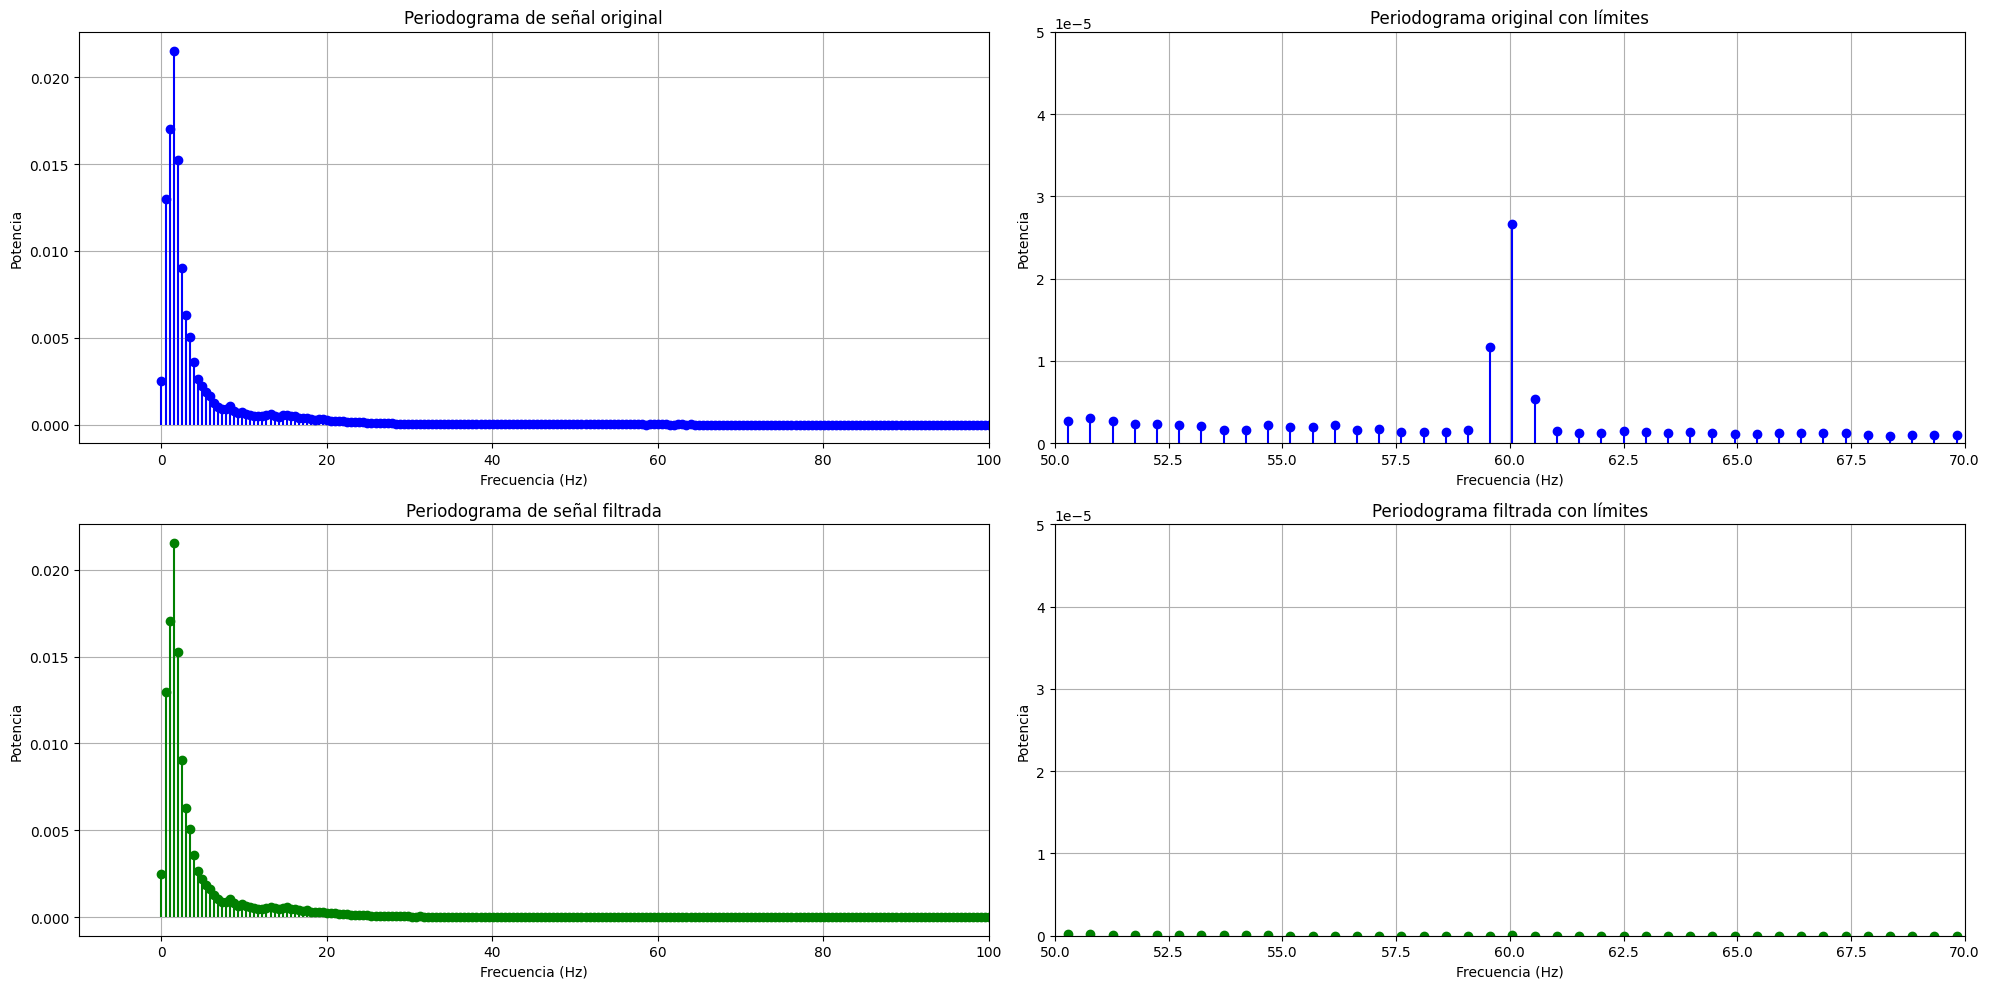

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del filtro FIR y de la señal
order = 30  # Orden del filtro
nyquist = fs / 2
cutoff_freq = 50 / nyquist  # Frecuencia de corte normalizada

# Filtro pasa bajas FIR
fir_filter = signal.firwin(order + 1, cutoff_freq, pass_zero='lowpass', window='hamming')
filtered_signal = signal.filtfilt(fir_filter, 1, snl_filtros_1)

# Definir el tiempo para el segmento de señales a graficar
tiempo = np.arange(0, len(snl_filtros_1) / fs, 1 / fs)

# Periodograma de Welch para ambas señales
f, Pxx = signal.welch(snl_filtros_1, fs, window='hann', nperseg=1024, noverlap=512)
f_filtered, Pxx_filtered = signal.welch(filtered_signal, fs, window='hann', nperseg=1024, noverlap=512)

# Crear figura y ejes para los gráficos organizados en subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Segundo fig: Periodograma de Welch para las señales original y filtrada
# 1. Periodograma de la señal original
axs[0, 0].stem(f, Pxx, linefmt='b-', markerfmt='bo', basefmt=' ')
axs[0, 0].set_title('Periodograma de señal original')
axs[0, 0].set_xlabel('Frecuencia (Hz)')
axs[0, 0].set_ylabel('Potencia')
axs[0, 0].set_xlim(-10, 100)
axs[0, 0].grid(True)

# 2. Periodograma de la señal original con límite en x y y
axs[0, 1].stem(f, Pxx, linefmt='b-', markerfmt='bo', basefmt=' ')
axs[0, 1].set_xlim(50, 70)
axs[0, 1].set_ylim(0, 0.00005)
axs[0, 1].set_title('Periodograma original con límites')
axs[0, 1].set_xlabel('Frecuencia (Hz)')
axs[0, 1].set_ylabel('Potencia')
axs[0, 1].grid(True)

# 3. Periodograma de la señal filtrada
axs[1, 0].stem(f_filtered, Pxx_filtered, linefmt='g-', markerfmt='go', basefmt=' ')
axs[1, 0].set_title('Periodograma de señal filtrada')
axs[1, 0].set_xlabel('Frecuencia (Hz)')
axs[1, 0].set_ylabel('Potencia')
axs[1, 0].set_xlim(-10, 100)
axs[1, 0].grid(True)

# 4. Periodograma de la señal filtrada con límite en x y y
axs[1, 1].stem(f_filtered, Pxx_filtered, linefmt='g-', markerfmt='go', basefmt=' ')
axs[1, 1].set_xlim(50, 70)
axs[1, 1].set_ylim(0, 0.00005)
axs[1, 1].set_title('Periodograma filtrada con límites')
axs[1, 1].set_xlabel('Frecuencia (Hz)')
axs[1, 1].set_ylabel('Potencia')
axs[1, 1].grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


─────────────── ⋆⋅☆⋅⋆ ───────────────

**Grafique un segmento de las señales antes y después de filtrar, analice los
cambios.**

El cambio principal observado entre las gráficas de la señal filtrada y sin filtrar radica en la eliminación del ruido de la red eléctrica ubicado en el rango de 58 a 61 Hz resultado que habla de la efectividad del filtro aplicado, una vez erradicadas estas interferencias se indica que los puntos principales de concentración de potencia se ubican a intervalos bajos de frecuencia (entre 1 y 16Hz), adicionalmente, se observan tanto en el periodograma como en el anális temporal que las variaciones de la señal debido al filtro aplicado son mínimas, esto podría explicarse debido a que existe la posibilidad de que la mayoría de las variaciones significativas de la señal original están por debajo de la frecuencia de corte escogida, debido a que no conocemos la naturaleza de la señal y sus frecuencias de análisis, por ello, el filtro tiene poco efecto en esas componentes, manteniéndolas casi intactas.

Adicionalmente, puede pasar que la señal contiene principalmente componentes de otras frecuencias y es por ello que el filtrado no cambiará visiblemente la forma de la señal. Dado que en este caso, se nota que los cambios son sutiles que son difíciles de detectar a simple vista, especialmente si la escala de la gráfica no está ajustada adecuadamente. Es posible que los cambios se hagan más evidentes al hacer un zoom en ciertas partes de la señal o al observar las diferencias en una escala diferente.

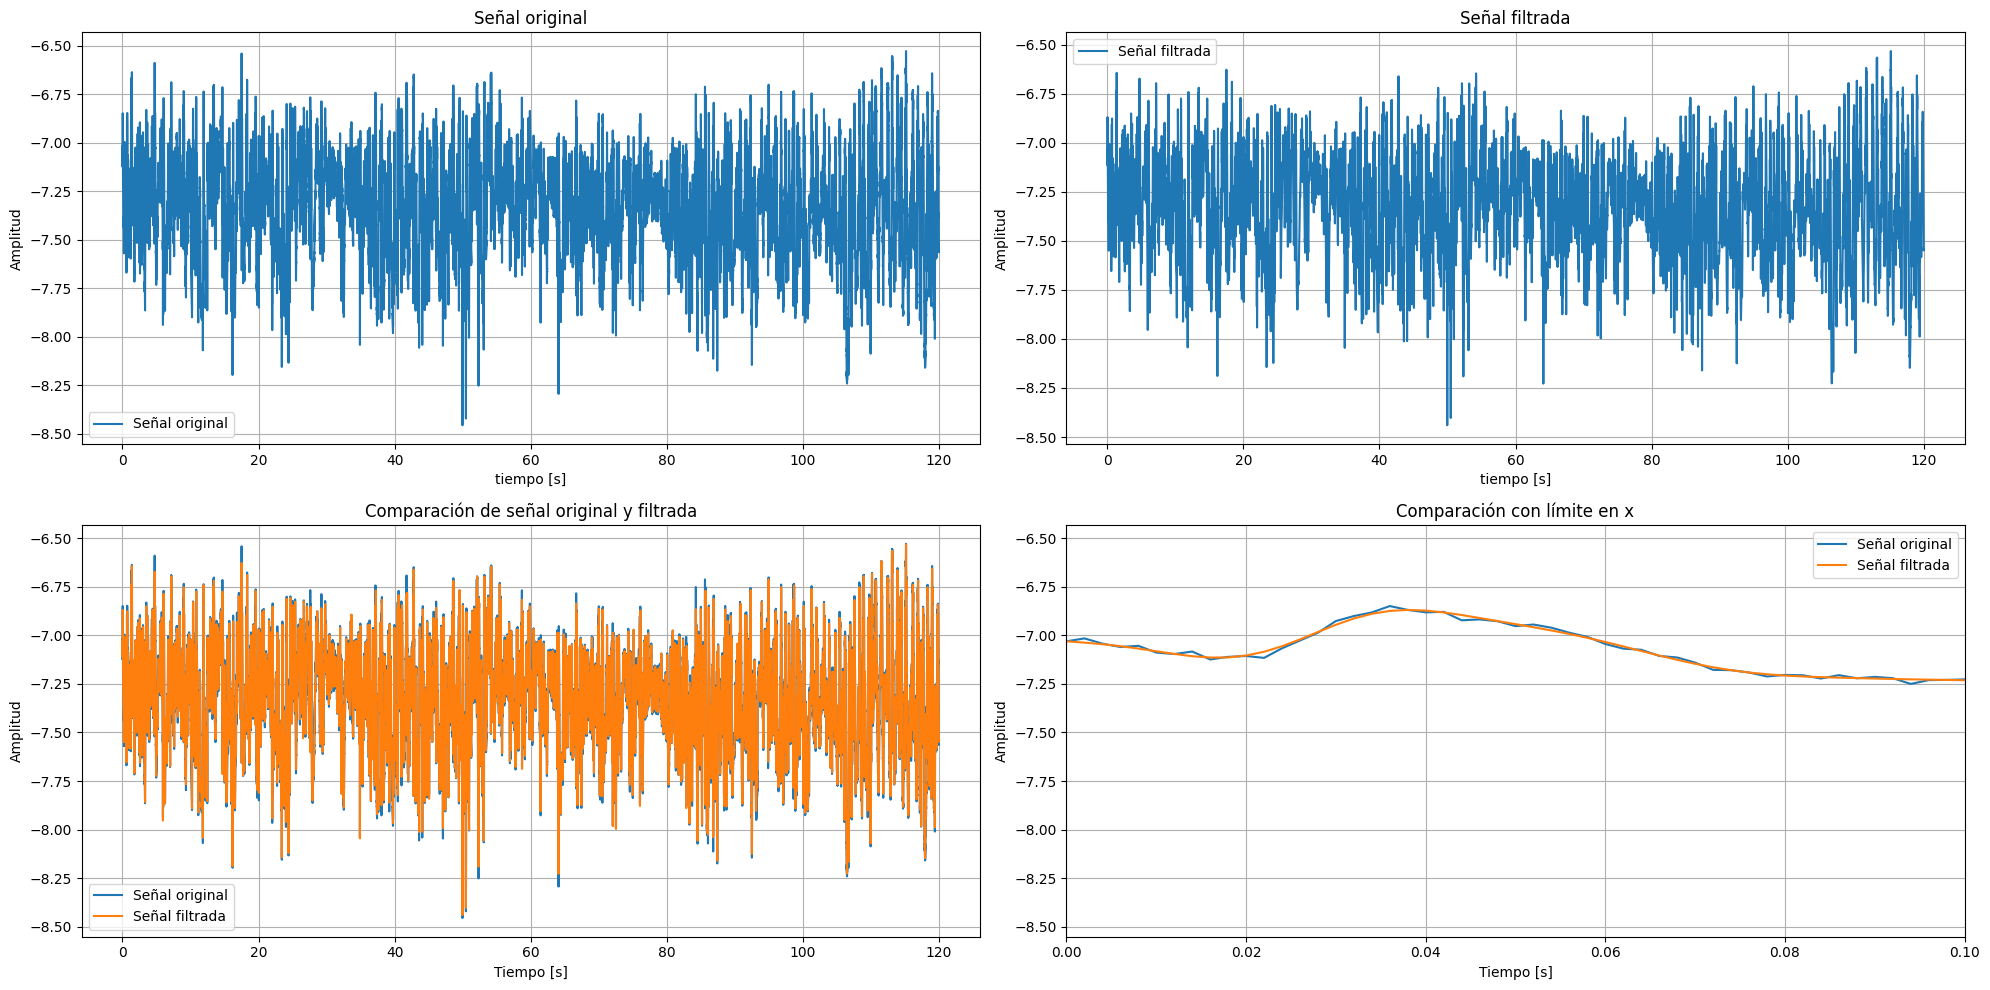

In [ ]:
# Crear figura y ejes para los gráficos organizados en subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Primer eje: Señal original, señal filtrada y comparaciones
# 1. Señal original
axs[0, 0].plot(tiempo, snl_filtros_1, label='Señal original')
axs[0, 0].set_title('Señal original')
axs[0, 0].set_xlabel('tiempo [s]')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 1. Señal filtrada
axs[0, 1].plot(tiempo, filtered_signal, label='Señal filtrada')
axs[0, 1].set_title('Señal filtrada')
axs[0, 1].set_xlabel('tiempo [s]')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Comparación de señal original y filtrada sin limite
axs[1, 0].plot(tiempo, snl_filtros_1, label='Señal original')
axs[1, 0].plot(tiempo, filtered_signal, label='Señal filtrada')
axs[1, 0].set_title('Comparación de señal original y filtrada')
axs[1, 0].set_xlabel('Tiempo [s]')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 4. Comparación de señal original y filtrada con límite en el eje x
axs[1, 1].plot(tiempo, snl_filtros_1, label='Señal original')
axs[1, 1].plot(tiempo, filtered_signal, label='Señal filtrada')
axs[1, 1].set_xlim(0, 0.1)
axs[1, 1].set_title('Comparación con límite en x')
axs[1, 1].set_xlabel('Tiempo [s]')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

#**Conclusiones**


1.   La aplicación de filtros FIR o IIR implican el potenciamiento y sacrificio de parámetros como estabilidad y conservación de banda de paso, oscilaciones constantes  en banda de rechazo, inestabilidad de la fase y aumento de ancho de banda.
2. Se certifica la efectividad del filtro FIR para la eliminación de componentes de potencia indeseados que distorionan o enmascaran los datos de la señal de interés, siendo un ejemplo de esto la eliminación del ruido propio de la red eléctrica.
3. Se indentificó la influencia del orden seleccionado en la respuesta del filtro ante una señal brindada, donde al abarcar altos valores de orden se obtiene una banda de transición más selectiva con un comportamiento cercano a la idealidad, no obtante esta característica se ve sometida a la distorsión de la fase y a la aparición de oscilaciones indeseadas.




**REFERENCIAS BIBLIOGRÁFICAS**


[1] The SciPy community, "scipy.signal.firwin," last updated on Jan. 21, 2020. [Online]. Available: https://docs.scipy.org/doc//scipy-1.2.3/reference/generated/scipy.signal.firwin.html#:~:text=FIR%20filter%20design%20using%20the,II%20if%20numtaps%20is%20even. [Accessed: Oct. 30, 2024].

[2] Bioinstrumentación analógica, Isabel Cristina Muñoz, Programa de bioingeniería - Universidad de Antioquia, 2024.


